In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from dateutil.relativedelta import relativedelta
from datetime import datetime

In [ ]:
%matplotlib inline
from google.colab import files
uploaded = files.upload()

Saving McDonald_s_Reviews.csv to McDonald_s_Reviews (1).csv


In [ ]:
df = pd.read_csv('McDonald_s_Reviews.csv', encoding='ISO-8859-1')

df.head()

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4 stars
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and che...,1 star
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5 stars
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1 star


In [ ]:
df.describe()


,reviewer_id,latitude,longitude
count,33396.000000,32736.000000,32736.000000
mean,16698.500000,34.442546,-90.647033
std,9640.739131,5.344116,16.594844
min,1.000000,25.790295,-121.995421
25%,8349.750000,28.655350,-97.792874
50%,16698.500000,33.931261,-81.471414
75%,25047.250000,40.727401,-75.399919
max,33396.000000,44.981410,-73.459820


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33396 entries, 0 to 33395
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   reviewer_id    33396 non-null  int64  
 1   store_name     33396 non-null  object 
 2   category       33396 non-null  object 
 3   store_address  33396 non-null  object 
 4   latitude       32736 non-null  float64
 5   longitude      32736 non-null  float64
 6   rating_count   33396 non-null  object 
 7   review_time    33396 non-null  object 
 8   review         33396 non-null  object 
 9   rating         33396 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 2.5+ MB


In [ ]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33396 entries, 0 to 33395
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   reviewer_id    33396 non-null  int64  
 1   store_name     33396 non-null  object 
 2   category       33396 non-null  object 
 3   store_address  33396 non-null  object 
 4   latitude       32736 non-null  float64
 5   longitude      32736 non-null  float64
 6   rating_count   33396 non-null  object 
 7   review_time    33396 non-null  object 
 8   review         33396 non-null  object 
 9   rating         33396 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 2.8+ MB


# Визуализация распределения рейтингов:

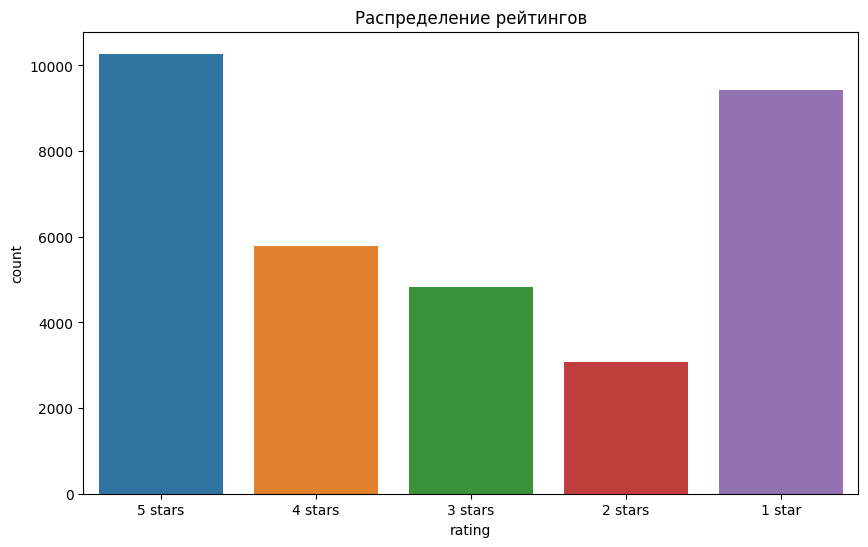

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=df, order=df['rating'].sort_values(ascending=False).unique())
plt.title('Распределение рейтингов')
plt.show()

На графике распределения рейтингов видно, что большинство отзывов представлены высоким рейтингом (**5 звезд**), что может свидетельствовать о том, что большинство клиентов McDonald's остаются довольными обслуживанием. Однако, также видно, что количество отзывов убывает по мере уменьшения рейтинга, что может быть вызвано меньшей активностью клиентов в оставлении отрицательных отзывов. В дальнейшем исследовании целесообразно более детально рассмотреть отзывы с низким рейтингом для выявления проблемных аспектов обслуживания.


# Анализ времени отзывов:







In [ ]:
def convert_to_date(time_string):
    if 'months' in time_string:
        months_ago = int(time_string.split()[0])
        return datetime.now() - relativedelta(months=months_ago)
    elif 'days' in time_string:
        days_ago = int(time_string.split()[0])
        return datetime.now() - relativedelta(days=days_ago)
    elif 'year' in time_string:
        if 'a' in time_string:
            return datetime.now() - relativedelta(years=1)
        else:
            years_ago = int(time_string.split()[0])
            return datetime.now() - relativedelta(years=years_ago)
    else:
        return datetime.now()


df

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating,review_time_converted,review_month_year,rating_class,month
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star,2023-09-12 13:58:15.240733,September 2023,Отрицательная,9
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4 stars,2023-12-07 13:58:15.240847,December 2023,Положительная,12
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and che...,1 star,2023-12-07 13:58:15.240901,December 2023,Отрицательная,12
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5 stars,2023-12-12 13:58:15.240932,December 2023,Положительная,12
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1 star,2023-10-12 13:58:15.240935,October 2023,Отрицательная,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33322,33323,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",7 months ago,1 hour for two hamburgers,1 star,2023-05-12 13:58:15.330114,May 2023,Отрицательная,5
33351,33352,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",8 months ago,good food,5 stars,2023-04-12 13:58:15.330129,April 2023,Положительная,4
33355,33356,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",9 months ago,Very good breakfasts,5 stars,2023-03-12 13:58:15.330145,March 2023,Положительная,3
33357,33358,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",6 months ago,no power the cardboard straws,2 stars,2023-06-12 13:58:15.330178,June 2023,Нейтральная,6


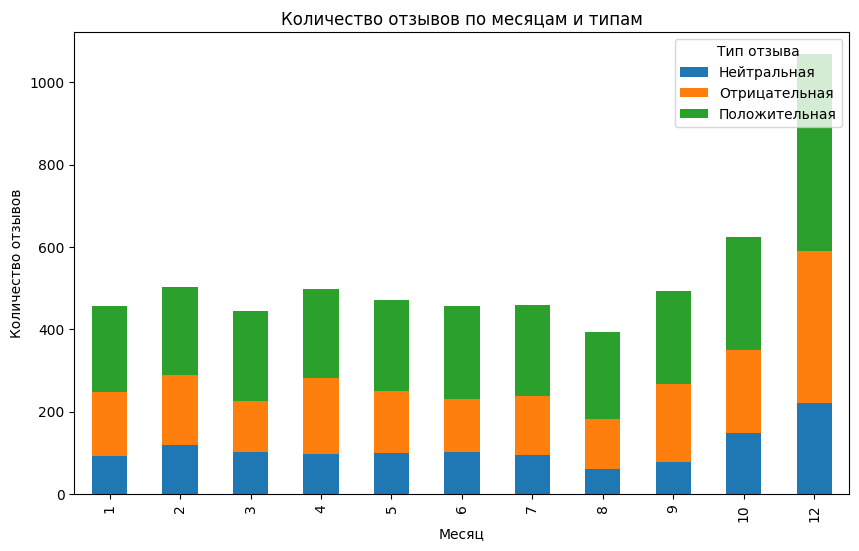

In [ ]:
def classify_rating(rating):
    if '1 star' in rating:
        return 'Отрицательная'
    elif '2 stars' in rating or '3 stars' in rating:
        return 'Нейтральная'
    elif '4 stars' in rating or '5 stars' in rating:
        return 'Положительная'
    else:
        return 'Не определена'

# Применение функции классификации рейтинга к столбцу 'rating'
df['rating_class'] = df['rating'].apply(classify_rating)

# Применение функции к столбцу 'review_time' и создание нового столбца 'review_time_converted'
df['review_time_converted'] = df['review_time'].apply(convert_to_date)

# Отфильтровать строки, где 'review_time' содержит 'year ago'
df = df[~df['review_time'].str.contains('year')]

# Добавление столбца 'month' для группировки по месяцам
df['month'] = df['review_time_converted'].dt.month

# Группировка данных по столбцам 'month' и 'rating_class'
grouped_data = df.groupby(['month', 'rating_class']).size().unstack()

# Постройте столбчатую диаграмму
grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Количество отзывов по месяцам и типам')
plt.xlabel('Месяц')
plt.ylabel('Количество отзывов')
plt.legend(title='Тип отзыва', loc='upper right')
plt.show()

In [ ]:
print(grouped_data)

rating_class  Нейтральная  Отрицательная  Положительная
month                                                  
1                      92            157            208
2                     119            170            214
3                     101            126            217
4                      98            183            217
5                     100            151            221
6                     101            131            224
7                      96            143            219
8                      61            121            211
9                      79            189            224
10                    149            200            276
12                    221            369            478


**Нейтральная оценка:**

*   На протяжении года нейтральные оценки колеблются, начиная от минимума в августе и достигая максимума в декабре.
*   Больше всего нейтральных оценок в декабре – 221 шт.

**Отрицательная оценка:**

*   Наблюдается значительный рост отрицательных оценок в октябре и декабре,
достигая пика в декабре (369 шт.).
*   Самый низкий показатель в августе (121 шт.).

**Положительная оценка:**

*   Количество положительных оценок также растет в течение года, с пиком в декабре (478 шт.).
*  Наименьшее количество положительных оценок в августе (211 шт.).

**Общий вывод:**

*   Декабрь выделяется как месяц с наибольшим количеством оценок во всех трех категориях (можно предположить, что была какая-либо акция).
*   Отрицательные оценки существенно возрастают в октябре и декабре.
*   Нейтральные оценки имеют более устойчивый характер с легкими колебаниями в течение года.
*   Положительные оценки также растут, особенно в конце года.
